# Project on Movie ratings & recommendations
## Using a KNN (K-nearest neighbor) model

In [1]:
import numpy as np
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler

## The datasets(for the movies and for the credits)
To get the datasets go to:

https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata


In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
credits = pd.read_csv('tmdb_5000_credits.csv')

In [5]:
credits.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


We are concerned in getting the ratings for the movies

In [6]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [7]:
credits.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

We have 4 columns with null-values but for columns:
_release_date & runtime_ they have very few null-values
, we could drop the rows with those null values


In [9]:
movies.genres[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [10]:
# make the genre output more structred and easy to read
# i.e getting the names only from genre as output
# sample test
print(type(movies.genres[0]))

<class 'str'>


In [11]:
movie_test_str = json.loads(movies.genres[0])

In [12]:
movies_test_output = [genre.get("name") for genre in movie_test_str]

In [13]:
movies_test_output

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [14]:
for movie_name in movies_test_output:
    print(movie_name)

Action
Adventure
Fantasy
Science Fiction


In [15]:
names = [genre['name'] for genre in movie_test_str]

print(names)

['Action', 'Adventure', 'Fantasy', 'Science Fiction']


In [16]:
# 2nd approach
# using re
re.findall('name', movies.genres[0])

['name', 'name', 'name', 'name']

In [17]:
re_name = re.findall(r'"name":\s*"([^"]+)"', movies.genres[0])

print(re_name)

['Action', 'Adventure', 'Fantasy', 'Science Fiction']


In [18]:
a = eval(movies.genres[0])

In [19]:
a

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [20]:
# 3rd approach
for i in range(len(a)):
    print(a[i]['name'])

Action
Adventure
Fantasy
Science Fiction


In [21]:
asd = [eval(movies.genres[0])[i] for i in range(len(eval(movies.genres[0])))]

In [22]:
asd

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [23]:
asd_names = [eval(movies.genres[0])[i]['name'] for i in range(len(eval(movies.genres[0])))]
asd_names

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [24]:
for i, k in zip(movies.genres, range(len(movies.genres))):
    a = eval(i)
    movies.genres[k] = [a[j]['name'] for j in range(len(eval(i)))]

C:\Users\Ashraf Mohammed\AppData\Local\Temp\ipykernel_27132\2649783168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.genres[k] = [a[j]['name'] for j in range(len(eval(i)))]


In [25]:
movies.genres[0]

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [26]:
movies.genres

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Action, Crime, Thriller]
4799                                [Comedy, Romance]
4800               [Comedy, Drama, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: genres, Length: 4803, dtype: object

In [27]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [28]:
# using same approach for:
# keywords
# production_companies
# production_countries
# spoken_languages
movies2 = movies.copy()

In [29]:
movies2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [30]:
type(movies.keywords)

pandas.core.series.Series

In [31]:
movies2.keywords

0       [{"id": 1463, "name": "culture clash"}, {"id":...
1       [{"id": 270, "name": "ocean"}, {"id": 726, "na...
2       [{"id": 470, "name": "spy"}, {"id": 818, "name...
3       [{"id": 849, "name": "dc comics"}, {"id": 853,...
4       [{"id": 818, "name": "based on novel"}, {"id":...
                              ...                        
4798    [{"id": 5616, "name": "united states\u2013mexi...
4799                                                   []
4800    [{"id": 248, "name": "date"}, {"id": 699, "nam...
4801                                                   []
4802    [{"id": 1523, "name": "obsession"}, {"id": 224...
Name: keywords, Length: 4803, dtype: object

In [32]:
movies2.keywords[2]

'[{"id": 470, "name": "spy"}, {"id": 818, "name": "based on novel"}, {"id": 4289, "name": "secret agent"}, {"id": 9663, "name": "sequel"}, {"id": 14555, "name": "mi6"}, {"id": 156095, "name": "british secret service"}, {"id": 158431, "name": "united kingdom"}]'

In [33]:
# production_companies
for i, k in zip(movies2.production_companies, range(len(movies2.production_companies))):
    a = eval(i)
    movies2.production_companies[k] = [a[j]['name'] for j in range(len(eval(i)))]

C:\Users\Ashraf Mohammed\AppData\Local\Temp\ipykernel_27132\258002044.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies2.production_companies[k] = [a[j]['name'] for j in range(len(eval(i)))]


In [34]:
type(movies.production_companies)

pandas.core.series.Series

In [35]:
movies2.production_companies

0       [Ingenious Film Partners, Twentieth Century Fo...
1       [Walt Disney Pictures, Jerry Bruckheimer Films...
2                        [Columbia Pictures, Danjaq, B24]
3       [Legendary Pictures, Warner Bros., DC Entertai...
4                                  [Walt Disney Pictures]
                              ...                        
4798                                  [Columbia Pictures]
4799                                                   []
4800    [Front Street Pictures, Muse Entertainment Ent...
4801                                                   []
4802         [rusty bear entertainment, lucky crow films]
Name: production_companies, Length: 4803, dtype: object

In [36]:
# production_countries
for i, k in zip(movies2.production_countries, range(len(movies2.production_countries))):
    a = eval(i)
    movies2.production_countries[k] = [a[j]['name'] for j in range(len(eval(i)))]

C:\Users\Ashraf Mohammed\AppData\Local\Temp\ipykernel_27132\2954795793.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies2.production_countries[k] = [a[j]['name'] for j in range(len(eval(i)))]


In [37]:
movies2.production_countries

0       [United States of America, United Kingdom]
1                       [United States of America]
2       [United Kingdom, United States of America]
3                       [United States of America]
4                       [United States of America]
                           ...                    
4798            [Mexico, United States of America]
4799                                            []
4800                    [United States of America]
4801             [United States of America, China]
4802                    [United States of America]
Name: production_countries, Length: 4803, dtype: object

In [38]:
# spoken_languages
for i, k in zip(movies2.spoken_languages, range(len(movies2.spoken_languages))):
    a = eval(i)
    movies2.spoken_languages[k] = [a[j]['name'] for j in range(len(eval(i)))]

C:\Users\Ashraf Mohammed\AppData\Local\Temp\ipykernel_27132\422800784.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies2.spoken_languages[k] = [a[j]['name'] for j in range(len(eval(i)))]


In [39]:
movies2.spoken_languages

0                                    [English, Español]
1                                             [English]
2       [Français, English, Español, Italiano, Deutsch]
3                                             [English]
4                                             [English]
                             ...                       
4798                                          [Español]
4799                                                 []
4800                                          [English]
4801                                          [English]
4802                                          [English]
Name: spoken_languages, Length: 4803, dtype: object

In [40]:
# worked for the copy, now lets modify the original
# keywords

for i, k in zip(movies.keywords, range(len(movies.keywords))):
    a = eval(i)
    movies.keywords[k] = [a[j]['name'] for j in range(len(eval(i)))]

C:\Users\Ashraf Mohammed\AppData\Local\Temp\ipykernel_27132\654613849.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.keywords[k] = [a[j]['name'] for j in range(len(eval(i)))]


In [41]:
# production_companies
for i, k in zip(movies.production_companies, range(len(movies.production_companies))):
    a = eval(i)
    movies.production_companies[k] = [a[j]['name'] for j in range(len(eval(i)))]

C:\Users\Ashraf Mohammed\AppData\Local\Temp\ipykernel_27132\4253255003.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.production_companies[k] = [a[j]['name'] for j in range(len(eval(i)))]


In [42]:
# production_countries
for i, k in zip(movies.production_countries, range(len(movies.production_countries))):
    a = eval(i)
    movies.production_countries[k] = [a[j]['name'] for j in range(len(eval(i)))]

C:\Users\Ashraf Mohammed\AppData\Local\Temp\ipykernel_27132\3513268031.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.production_countries[k] = [a[j]['name'] for j in range(len(eval(i)))]


In [43]:
# spoken_languages
for i, k in zip(movies.spoken_languages, range(len(movies.spoken_languages))):
    a = eval(i)
    movies.spoken_languages[k] = [a[j]['name'] for j in range(len(eval(i)))]

C:\Users\Ashraf Mohammed\AppData\Local\Temp\ipykernel_27132\3438123786.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.spoken_languages[k] = [a[j]['name'] for j in range(len(eval(i)))]


In [44]:
movies.iloc[140]

budget                                                          150000000
genres                                          [Action, Drama, Thriller]
homepage                                                              NaN
id                                                                 117251
keywords                [usa president, conspiracy, secret service, th...
original_language                                                      en
original_title                                           White House Down
overview                Capitol Policeman John Cale has just been deni...
popularity                                                      39.004588
production_companies    [Columbia Pictures, Centropolis Entertainment,...
production_countries                           [United States of America]
release_date                                                   2013-06-27
revenue                                                         205366737
runtime                               

In [45]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [46]:
# homepage has null values of greater than 60% of the total rows
# we could drop this column, also this column wont affect much our target
movies.drop('homepage', axis=1, inplace=True)

In [47]:
# for tagline
# its a string not numeric and its values are unique for each row
# has no groupings or patterns 
# thus no effect on our target
# we can drop it
movies.drop('tagline', axis=1, inplace=True)

In [48]:
# for runtime, overview and release_date
# has very little null rows
cop = movies.copy()

In [49]:
cop.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [50]:
cop[cop.runtime.isnull()]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
2656,15000000,[Drama],370980,"[pope, biography]",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,[Taodue Film],[Italy],2015-12-03,0,NaN,[Español],Released,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,[Documentary],459488,"[music, actors, legendary perfomer, classic ho...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,[Eyeline Entertainment],[United Kingdom],2015-12-12,0,NaN,[],Released,"To Be Frank, Sinatra at 100",0.0,0


In [51]:
# for the 2 null rows of runtime, there're also
# null in overview
# deleting these null values will also delete 2 out of the 3 null rows
# in overview
cop.dropna(inplace=True)

In [52]:
cop.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [53]:
movies.dropna(inplace=True)

In [54]:
movies.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

_it is now a null free dataset_

In [55]:
movies.shape

(4799, 18)

In [56]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4799 non-null   int64  
 1   genres                4799 non-null   object 
 2   id                    4799 non-null   int64  
 3   keywords              4799 non-null   object 
 4   original_language     4799 non-null   object 
 5   original_title        4799 non-null   object 
 6   overview              4799 non-null   object 
 7   popularity            4799 non-null   float64
 8   production_companies  4799 non-null   object 
 9   production_countries  4799 non-null   object 
 10  release_date          4799 non-null   object 
 11  revenue               4799 non-null   int64  
 12  runtime               4799 non-null   float64
 13  spoken_languages      4799 non-null   object 
 14  status                4799 non-null   object 
 15  title                

In [57]:
# split 'release_date' into
# 'release_day', 'release_month' and 'release_year'
cop.release_date

0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4798    1992-09-04
4799    2011-12-26
4800    2013-10-13
4801    2012-05-03
4802    2005-08-05
Name: release_date, Length: 4799, dtype: object

In [58]:
type(cop.release_date)

pandas.core.series.Series

In [59]:
cop[['release_year', 'release_month', 'release_day']] = cop['release_date'].str.split('-', expand=True)

In [60]:
cop['release_year'] = cop['release_year'].astype(int)
cop['release_month'] = cop['release_month'].astype(int)
cop['release_day'] = cop['release_day'].astype(int)

In [61]:
cop.head(20)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,release_year,release_month,release_day
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,2787965087,162.0,"[English, Español]",Released,Avatar,7.2,11800,2009,12,10
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,961000000,169.0,[English],Released,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,19
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",...,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,Spectre,6.3,4466,2015,10,26
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],...,1084939099,165.0,[English],Released,The Dark Knight Rises,7.6,9106,2012,7,16
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],...,284139100,132.0,[English],Released,John Carter,6.1,2124,2012,3,7
5,258000000,"[Fantasy, Action, Adventure]",559,"[dual identity, amnesia, sandstorm, love of on...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[Columbia Pictures, Laura Ziskin Productions, ...",[United States of America],...,890871626,139.0,"[English, Français]",Released,Spider-Man 3,5.9,3576,2007,5,1
6,260000000,"[Animation, Family]",38757,"[hostage, magic, horse, fairy tale, musical, p...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[Walt Disney Pictures, Walt Disney Animation S...",[United States of America],...,591794936,100.0,[English],Released,Tangled,7.4,3330,2010,11,24
7,280000000,"[Action, Adventure, Science Fiction]",99861,"[marvel comic, sequel, superhero, based on com...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[Marvel Studios, Prime Focus, Revolution Sun S...",[United States of America],...,1405403694,141.0,[English],Released,Avengers: Age of Ultron,7.3,6767,2015,4,22
8,250000000,"[Adventure, Fantasy, Family]",767,"[witch, magic, broom, school of witchcraft, wi...",en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[Warner Bros., Heyday Films]","[United Kingdom, United States of America]",...,933959197,153.0,[English],Released,Harry Potter and the Half-Blood Prince,7.4,5293,2009,7,7
9,250000000,"[Action, Adventure, Fantasy]",209112,"[dc comics, vigilante, superhero, based on com...",en,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,155.790452,"[DC Comics, Atlas Entertainment, Warner Bros.,...",[United States of America],...,873260194,151.0,[English],Released,Batman v Superman: Dawn of Justice,5.7,7004,2016,3,23


In [62]:
cop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4802
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4799 non-null   int64  
 1   genres                4799 non-null   object 
 2   id                    4799 non-null   int64  
 3   keywords              4799 non-null   object 
 4   original_language     4799 non-null   object 
 5   original_title        4799 non-null   object 
 6   overview              4799 non-null   object 
 7   popularity            4799 non-null   float64
 8   production_companies  4799 non-null   object 
 9   production_countries  4799 non-null   object 
 10  release_date          4799 non-null   object 
 11  revenue               4799 non-null   int64  
 12  runtime               4799 non-null   float64
 13  spoken_languages      4799 non-null   object 
 14  status                4799 non-null   object 
 15  title                

In [63]:
cop.release_date

0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4798    1992-09-04
4799    2011-12-26
4800    2013-10-13
4801    2012-05-03
4802    2005-08-05
Name: release_date, Length: 4799, dtype: object

In [64]:
# 2nd approach
cop['year'] = pd.DatetimeIndex(cop.release_date).year
cop['month'] = pd.DatetimeIndex(cop.release_date).month
cop['day'] = pd.DatetimeIndex(cop.release_date).day

In [65]:
cop.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,status,title,vote_average,vote_count,release_year,release_month,release_day,year,month,day
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,Released,Avatar,7.2,11800,2009,12,10,2009,12,10
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,Released,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,19,2007,5,19
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",...,Released,Spectre,6.3,4466,2015,10,26,2015,10,26
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],...,Released,The Dark Knight Rises,7.6,9106,2012,7,16,2012,7,16
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],...,Released,John Carter,6.1,2124,2012,3,7,2012,3,7


In [66]:
movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Released,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,[English],Released,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,[English],Released,John Carter,6.1,2124


In [67]:
# actual data
movies['year'] = pd.DatetimeIndex(cop.release_date).year
movies['month'] = pd.DatetimeIndex(cop.release_date).month
movies['day'] = pd.DatetimeIndex(cop.release_date).day

In [68]:
movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,year,month,day
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,2787965087,162.0,"[English, Español]",Released,Avatar,7.2,11800,2009,12,10
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,961000000,169.0,[English],Released,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,19
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",...,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,Spectre,6.3,4466,2015,10,26
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],...,1084939099,165.0,[English],Released,The Dark Knight Rises,7.6,9106,2012,7,16
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],...,284139100,132.0,[English],Released,John Carter,6.1,2124,2012,3,7


In [69]:
movies.drop('release_date', axis=1, inplace=True)

In [70]:
movies.head(5)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,year,month,day
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2787965087,162.0,"[English, Español]",Released,Avatar,7.2,11800,2009,12,10
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],961000000,169.0,[English],Released,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,19
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,Spectre,6.3,4466,2015,10,26
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],1084939099,165.0,[English],Released,The Dark Knight Rises,7.6,9106,2012,7,16
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],284139100,132.0,[English],Released,John Carter,6.1,2124,2012,3,7


In [71]:
movies.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'revenue', 'runtime', 'spoken_languages',
       'status', 'title', 'vote_average', 'vote_count', 'year', 'month',
       'day'],
      dtype='object')

In [72]:
credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [73]:
# Join credits and movies based on the movie id
movies = pd.merge(movies, credits, left_on='id', right_on='movie_id')

In [74]:
movies.head(5)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,title_x,vote_average,vote_count,year,month,day,movie_id,title_y,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,Avatar,7.2,11800,2009,12,10,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,19,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",...,Spectre,6.3,4466,2015,10,26,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],...,The Dark Knight Rises,7.6,9106,2012,7,16,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],...,John Carter,6.1,2124,2012,3,7,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [75]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4798
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4799 non-null   int64  
 1   genres                4799 non-null   object 
 2   id                    4799 non-null   int64  
 3   keywords              4799 non-null   object 
 4   original_language     4799 non-null   object 
 5   original_title        4799 non-null   object 
 6   overview              4799 non-null   object 
 7   popularity            4799 non-null   float64
 8   production_companies  4799 non-null   object 
 9   production_countries  4799 non-null   object 
 10  revenue               4799 non-null   int64  
 11  runtime               4799 non-null   float64
 12  spoken_languages      4799 non-null   object 
 13  status                4799 non-null   object 
 14  title_x               4799 non-null   object 
 15  vote_average         

In [76]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,year,month,day,movie_id
count,4.799000e+03,4799.000000,4799.000000,4.799000e+03,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000
mean,2.906593e+07,56899.920192,21.509884,8.232920e+07,106.903105,6.094186,690.789123,2002.461138,6.794332,15.180454,56899.920192
std,4.073251e+07,88236.500208,31.824074,1.629076e+08,22.561305,1.188340,1234.941795,12.414480,3.423371,8.644979,88236.500208
min,0.000000e+00,5.000000,0.000372,0.000000e+00,0.000000,0.000000,0.000000,1916.000000,1.000000,1.000000,5.000000
25%,8.000000e+05,9012.500000,4.685547,0.000000e+00,94.000000,5.600000,54.000000,1999.000000,4.000000,8.000000,9012.500000
50%,1.500000e+07,14623.000000,12.929525,1.918402e+07,103.000000,6.200000,236.000000,2005.000000,7.000000,15.000000,14623.000000
75%,4.000000e+07,58461.500000,28.350728,9.295652e+07,118.000000,6.800000,737.500000,2011.000000,10.000000,22.000000,58461.500000
max,3.800000e+08,447027.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2017.000000,12.000000,31.000000,447027.000000


In [77]:
movies.cast[0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [78]:
movies.crew[0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [79]:
# structure cast, to get names only
for i, k in zip(movies.cast, range(len(movies.cast))):
    a = eval(i)
    movies.cast[k] = [a[j]['name'] for j in range(len(eval(i)))]

C:\Users\Ashraf Mohammed\AppData\Local\Temp\ipykernel_27132\1545091110.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.cast[k] = [a[j]['name'] for j in range(len(eval(i)))]


In [80]:
movies.cast[0]

['Sam Worthington',
 'Zoe Saldana',
 'Sigourney Weaver',
 'Stephen Lang',
 'Michelle Rodriguez',
 'Giovanni Ribisi',
 'Joel David Moore',
 'CCH Pounder',
 'Wes Studi',
 'Laz Alonso',
 'Dileep Rao',
 'Matt Gerald',
 'Sean Anthony Moran',
 'Jason Whyte',
 'Scott Lawrence',
 'Kelly Kilgour',
 'James Patrick Pitt',
 'Sean Patrick Murphy',
 'Peter Dillon',
 'Kevin Dorman',
 'Kelson Henderson',
 'David Van Horn',
 'Jacob Tomuri',
 'Michael Blain-Rozgay',
 'Jon Curry',
 'Luke Hawker',
 'Woody Schultz',
 'Peter Mensah',
 'Sonia Yee',
 'Jahnel Curfman',
 'Ilram Choi',
 'Kyla Warren',
 'Lisa Roumain',
 'Debra Wilson',
 'Chris Mala',
 'Taylor Kibby',
 'Jodie Landau',
 'Julie Lamm',
 'Cullen B. Madden',
 'Joseph Brady Madden',
 'Frankie Torres',
 'Austin Wilson',
 'Sara Wilson',
 'Tamica Washington-Miller',
 'Lucy Briant',
 'Nathan Meister',
 'Gerry Blair',
 'Matthew Chamberlain',
 'Paul Yates',
 'Wray Wilson',
 'James Gaylyn',
 'Melvin Leno Clark III',
 'Carvon Futrell',
 'Brandon Jelkes',
 'Mica

In [81]:
movies.cast

0       [Sam Worthington, Zoe Saldana, Sigourney Weave...
1       [Johnny Depp, Orlando Bloom, Keira Knightley, ...
2       [Daniel Craig, Christoph Waltz, Léa Seydoux, R...
3       [Christian Bale, Michael Caine, Gary Oldman, A...
4       [Taylor Kitsch, Lynn Collins, Samantha Morton,...
                              ...                        
4794    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4795    [Edward Burns, Kerry Bishé, Marsha Dietlein, C...
4796    [Eric Mabius, Kristin Booth, Crystal Lowe, Geo...
4797    [Daniel Henney, Eliza Coupe, Bill Paxton, Alan...
4798    [Drew Barrymore, Brian Herzlinger, Corey Feldm...
Name: cast, Length: 4799, dtype: object

In [82]:
# for the crew we store the crew name
# but also have 2 other columns
# department column to store the crew's department
# director column to store the crew's dorector name if it has one
movies.crew[0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [83]:
# structure crew, to get department names in another columns
crew_dept = []
for i, k in zip(movies.crew, range(len(movies.crew))):
    dept = [eval(i)[j]['department'] for j in range(len(eval(i)))]
    crew_dept.append(dept)

In [87]:
# install Numba for faster running of 
# time-consuming code
!pip install numba

Defaulting to user installation because normal site-packages is not writeable


In [84]:
crew_dept

[['Editing',
  'Art',
  'Sound',
  'Sound',
  'Production',
  'Sound',
  'Directing',
  'Writing',
  'Editing',
  'Production',
  'Writing',
  'Art',
  'Visual Effects',
  'Production',
  'Art',
  'Sound',
  'Sound',
  'Sound',
  'Sound',
  'Costume & Make-Up',
  'Production',
  'Art',
  'Art',
  'Art',
  'Art',
  'Production',
  'Costume & Make-Up',
  'Camera',
  'Art',
  'Crew',
  'Costume & Make-Up',
  'Costume & Make-Up',
  'Camera',
  'Art',
  'Visual Effects',
  'Crew',
  'Editing',
  'Art',
  'Camera',
  'Crew',
  'Visual Effects',
  'Crew',
  'Art',
  'Art',
  'Art',
  'Crew',
  'Crew',
  'Visual Effects',
  'Art',
  'Art',
  'Production',
  'Art',
  'Costume & Make-Up',
  'Camera',
  'Costume & Make-Up',
  'Visual Effects',
  'Visual Effects',
  'Crew',
  'Visual Effects',
  'Costume & Make-Up',
  'Costume & Make-Up',
  'Visual Effects',
  'Art',
  'Costume & Make-Up',
  'Costume & Make-Up',
  'Costume & Make-Up',
  'Art',
  'Art',
  'Editing',
  'Art',
  'Crew',
  'Crew',
  '

In [85]:
len(crew_dept)

4799

In [89]:
# structure crew, to get department names in another columns


In [88]:
from numba import jit

In [90]:
@jit
def run():
    crew_jobs = []
    for i, k in zip(movies.crew, range(len(movies.crew))):
        job = [eval(i)[j]['name'] for j in range(len(eval(i))) if eval(i)(j)['job']=='Director']
        crew_jobs.append(job)
    return crew_jobs

    

In [96]:
c = []
for x in movies.crew:
    b = [person['name'] for person in json.loads(x) if person['job'] == 'Director']
    c.append(b)


In [94]:
movies.crew

0       [{"credit_id": "52fe48009251416c750aca23", "de...
1       [{"credit_id": "52fe4232c3a36847f800b579", "de...
2       [{"credit_id": "54805967c3a36829b5002c41", "de...
3       [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4       [{"credit_id": "52fe479ac3a36847f813eaa3", "de...
                              ...                        
4794    [{"credit_id": "52fe44eec3a36847f80b280b", "de...
4795    [{"credit_id": "52fe487dc3a368484e0fb013", "de...
4796    [{"credit_id": "52fe4df3c3a36847f8275ecf", "de...
4797    [{"credit_id": "52fe4ad9c3a368484e16a36b", "de...
4798    [{"credit_id": "58ce021b9251415a390165d9", "de...
Name: crew, Length: 4799, dtype: object

In [95]:
movies.crew[0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [97]:
c

[['James Cameron'],
 ['Gore Verbinski'],
 ['Sam Mendes'],
 ['Christopher Nolan'],
 ['Andrew Stanton'],
 ['Sam Raimi'],
 ['Byron Howard', 'Nathan Greno'],
 ['Joss Whedon'],
 ['David Yates'],
 ['Zack Snyder'],
 ['Bryan Singer'],
 ['Marc Forster'],
 ['Gore Verbinski'],
 ['Gore Verbinski'],
 ['Zack Snyder'],
 ['Andrew Adamson'],
 ['Joss Whedon'],
 ['Rob Marshall'],
 ['Barry Sonnenfeld'],
 ['Peter Jackson'],
 ['Marc Webb'],
 ['Ridley Scott'],
 ['Peter Jackson'],
 ['Chris Weitz'],
 ['Peter Jackson'],
 ['James Cameron'],
 ['Anthony Russo', 'Joe Russo'],
 ['Peter Berg'],
 ['Colin Trevorrow'],
 ['Sam Mendes'],
 ['Sam Raimi'],
 ['Shane Black'],
 ['Tim Burton'],
 ['Brett Ratner'],
 ['Dan Scanlon'],
 ['Michael Bay'],
 ['Michael Bay'],
 ['Sam Raimi'],
 ['Marc Webb'],
 ['Joseph Kosinski'],
 ['John Lasseter', 'Brad Lewis'],
 ['Martin Campbell'],
 ['Lee Unkrich'],
 ['McG'],
 ['James Wan'],
 ['Marc Forster'],
 ['Bryan Singer'],
 ['J.J. Abrams'],
 ['Bryan Singer'],
 ['Baz Luhrmann'],
 ['Mike Newell'],
 

In [98]:
# structure crew, to get names only
for i, k in zip(movies.crew, range(len(movies.crew))):
    a = eval(i)
    movies.crew[k] = [a[j]['name'] for j in range(len(eval(i)))]

C:\Users\Ashraf Mohammed\AppData\Local\Temp\ipykernel_27132\1976050791.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.crew[k] = [a[j]['name'] for j in range(len(eval(i)))]


In [99]:
movies.crew[0]

['Stephen E. Rivkin',
 'Rick Carter',
 'Christopher Boyes',
 'Christopher Boyes',
 'Mali Finn',
 'James Horner',
 'James Cameron',
 'James Cameron',
 'James Cameron',
 'James Cameron',
 'James Cameron',
 'Andrew Menzies',
 'Jill Brooks',
 'Margery Simkin',
 'Kevin Ishioka',
 'Dick Bernstein',
 'Shannon Mills',
 'Dennie Thorpe',
 'Jana Vance',
 'Deborah Lynn Scott',
 'Jon Landau',
 'Sean Haworth',
 'Kim Sinclair',
 'Kim Sinclair',
 'Richard F. Mays',
 'Laeta Kalogridis',
 'Mayes C. Rubeo',
 'Mauro Fiore',
 'Scott Herbertson',
 'Woody Schultz',
 'Linda DeVetta',
 'Linda DeVetta',
 'Richard Bluck',
 'Simon Bright',
 'Richard Martin',
 'Steve R. Moore',
 'John Refoua',
 'Karl J. Martin',
 'Chiling Lin',
 'Ilram Choi',
 'Steven Quale',
 'Carla Meyer',
 'Nick Bassett',
 'Jill Cormack',
 'Andy McLaren',
 'Terry Notary',
 'Garrett Warren',
 'Jonathan Rothbart',
 'Stefan Dechant',
 'Todd Cherniawsky',
 'Miranda Rivers',
 'Robert Stromberg',
 'John Harding',
 'Roberto De Angelis',
 'Mike Smithso

In [100]:
# add the columns of department and director names
movies['Director'] = c
movies['Department'] = crew_dept

In [101]:
movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,vote_count,year,month,day,movie_id,title_y,cast,crew,Director,Department
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,11800,2009,12,10,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B...",[James Cameron],"[Editing, Art, Sound, Sound, Production, Sound..."
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,4500,2007,5,19,285,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...",[Gore Verbinski],"[Camera, Directing, Production, Writing, Writi..."
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",...,4466,2015,10,26,206647,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Thomas Newman, Sam Mendes, Anna Pinnock, John...",[Sam Mendes],"[Sound, Directing, Art, Writing, Writing, Art,..."
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],...,9106,2012,7,16,49026,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Hans Zimmer, Charles Roven, Christopher Nolan...",[Christopher Nolan],"[Sound, Production, Writing, Directing, Produc..."
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],...,2124,2012,3,7,49529,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Andrew Stanton, John Lasseter...",[Andrew Stanton],"[Writing, Directing, Crew, Production, Product..."


In [102]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4798
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4799 non-null   int64  
 1   genres                4799 non-null   object 
 2   id                    4799 non-null   int64  
 3   keywords              4799 non-null   object 
 4   original_language     4799 non-null   object 
 5   original_title        4799 non-null   object 
 6   overview              4799 non-null   object 
 7   popularity            4799 non-null   float64
 8   production_companies  4799 non-null   object 
 9   production_countries  4799 non-null   object 
 10  revenue               4799 non-null   int64  
 11  runtime               4799 non-null   float64
 12  spoken_languages      4799 non-null   object 
 13  status                4799 non-null   object 
 14  title_x               4799 non-null   object 
 15  vote_average         

In [103]:
movies.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title_x                 0
vote_average            0
vote_count              0
year                    0
month                   0
day                     0
movie_id                0
title_y                 0
cast                    0
crew                    0
Director                0
Department              0
dtype: int64

In [104]:
movies.head(1)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,vote_count,year,month,day,movie_id,title_y,cast,crew,Director,Department
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,11800,2009,12,10,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B...",[James Cameron],"[Editing, Art, Sound, Sound, Production, Sound..."


In [105]:
movies.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'revenue', 'runtime', 'spoken_languages',
       'status', 'title_x', 'vote_average', 'vote_count', 'year', 'month',
       'day', 'movie_id', 'title_y', 'cast', 'crew', 'Director', 'Department'],
      dtype='object')

In [106]:
# Export the cleaned dataset
# to use later for a recommendation system
# Export the dataframe to a CSV file
movies.to_csv('cleaned_movies.csv', index=False)

In [108]:
# what features to use
features_to_use = ['budget', 'genres', 'keywords', 'popularity', 'revenue',
                   'runtime', 'status', 'title_x', 'vote_average',
                   'vote_count', 'year', 'month', 'day', 'Director', 'cast']

In [109]:
filtered_movies = movies[features_to_use]

In [110]:
filtered_movies.head()

,budget,genres,keywords,popularity,revenue,runtime,status,title_x,vote_average,vote_count,year,month,day,Director,cast
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",150.437577,2787965087,162.0,Released,Avatar,7.2,11800,2009,12,10,[James Cameron],"[Sam Worthington, Zoe Saldana, Sigourney Weave..."
1,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",139.082615,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,19,[Gore Verbinski],"[Johnny Depp, Orlando Bloom, Keira Knightley, ..."
2,245000000,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",107.376788,880674609,148.0,Released,Spectre,6.3,4466,2015,10,26,[Sam Mendes],"[Daniel Craig, Christoph Waltz, Léa Seydoux, R..."
3,250000000,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",112.312950,1084939099,165.0,Released,The Dark Knight Rises,7.6,9106,2012,7,16,[Christopher Nolan],"[Christian Bale, Michael Caine, Gary Oldman, A..."
4,260000000,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",43.926995,284139100,132.0,Released,John Carter,6.1,2124,2012,3,7,[Andrew Stanton],"[Taylor Kitsch, Lynn Collins, Samantha Morton,..."


In [111]:
# Move 'vote_average' to the end
columns = [col for col in filtered_movies.columns if col != 'vote_average'] + ['vote_average']
filtered_movies = filtered_movies[columns]




In [112]:
filtered_movies.head()

,budget,genres,keywords,popularity,revenue,runtime,status,title_x,vote_count,year,month,day,Director,cast,vote_average
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",150.437577,2787965087,162.0,Released,Avatar,11800,2009,12,10,[James Cameron],"[Sam Worthington, Zoe Saldana, Sigourney Weave...",7.2
1,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",139.082615,961000000,169.0,Released,Pirates of the Caribbean: At World's End,4500,2007,5,19,[Gore Verbinski],"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",6.9
2,245000000,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",107.376788,880674609,148.0,Released,Spectre,4466,2015,10,26,[Sam Mendes],"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",6.3
3,250000000,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",112.312950,1084939099,165.0,Released,The Dark Knight Rises,9106,2012,7,16,[Christopher Nolan],"[Christian Bale, Michael Caine, Gary Oldman, A...",7.6
4,260000000,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",43.926995,284139100,132.0,Released,John Carter,2124,2012,3,7,[Andrew Stanton],"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",6.1


In [127]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


In [129]:
# Function to convert list columns to strings
def convert_list_to_string(column):
    return column.apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

In [130]:
# Apply the function to the relevant columns
filtered_movies['genres'] = convert_list_to_string(filtered_movies['genres'])
filtered_movies['keywords'] = convert_list_to_string(filtered_movies['keywords'])
filtered_movies['Director'] = convert_list_to_string(filtered_movies['Director'])
filtered_movies['cast'] = convert_list_to_string(filtered_movies['cast'])

In [131]:
# one-hot encoding
filtered_movies_encoded = pd.get_dummies(filtered_movies, columns=['genres', 'keywords', 'status', 'title_x', 'Director', 'cast'])

# Define the features and target variable
features = ['budget', 'genres', 'keywords', 'popularity', 'revenue',
            'runtime', 'status', 'title_x', 'vote_count', 'year', 'month', 'day', 'Director', 'cast']
target = 'vote_average'

In [132]:
# Define X and y
X = filtered_movies_encoded.drop(columns=[target])
y = filtered_movies_encoded[target]

In [133]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [135]:
# Train the model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [136]:
# Make predictions 
y_pred = knn.predict(X_test_scaled)

In [137]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

3.87775294683231

In [138]:
from sklearn.metrics import accuracy_score

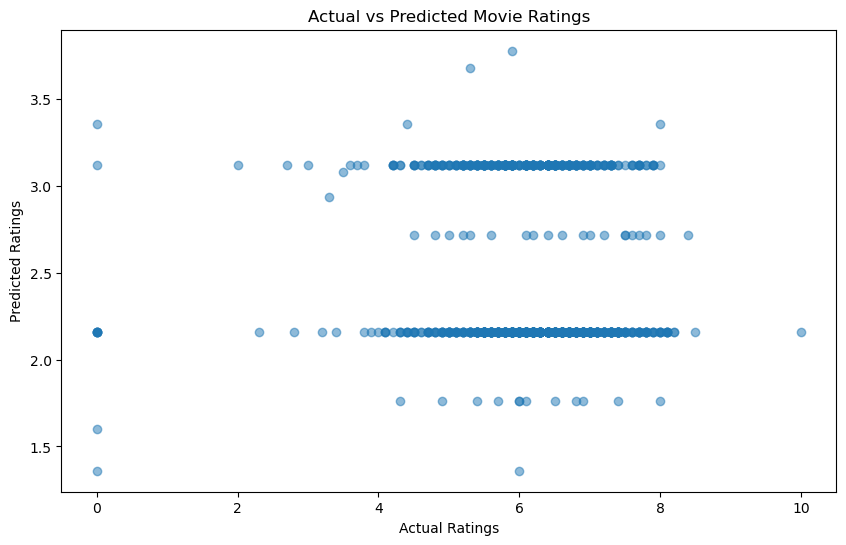

In [140]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Movie Ratings')
plt.show()